# Projet 7 : Effectuer une prédiction de revenus

## Scénario

Vous êtes employé dans une banque, présente dans de nombreux pays à travers le monde. Celle-ci souhaite cibler de nouveaux clients potentiels, plus particulièrement les jeunes en âge d'ouvrir leur tout premier compte bancaire.
Cependant, elle souhaite cibler les prospects les plus susceptibles d'avoir, plus tard dans leur vie, de hauts revenus.


L'équipe dans laquelle vous travaillez a donc reçu pour mission de créer un modèle permettant de déterminer le revenu potentiel d'une personne.
Très bien.


"Quelles informations avons-nous ?" demandez-vous à votre supérieur, qui vous répond : "À vrai dire... quasiment aucune : uniquement le revenu des parents, car nous allons cibler les enfants de nos clients actuels, ainsi que le pays où ils habitent. C'est tout ! Ah oui, une dernière chose : ce modèle doit être valable pour la plupart des pays du monde. Je vous laisse méditer là-dessus… Bon courage !"


Avec aussi peu de données disponibles, cela semble être un sacré challenge !

Ainsi, vous proposez une régression linéaire avec 3 variables :

- le revenu des parents ;
- le revenu moyen du pays dans lequel habite le prospect ;
- l'indice de Gini calculé sur les revenus des habitants du pays en question. 


Ce projet ne traite que de la construction et de l'interprétation du modèle. Vous n'irez pas jusqu'à la phase de prédiction. 

## Les données

Ce fichier contient les données de la [World Income Distribution](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/data-projet7.csv), datée de 2008.
Cette base de données est composée principalement d'études réalisées au niveau national pour bon nombre de pays, et contient les distributions de revenus des populations concernées.
Vous téléchargerez également les indices de Gini estimés par la Banque mondiale, disponibles à [cette adresse](http://data.worldbank.org/indicator/SI.POV.GINI). Libre à vous de trouver également d'autres sources, ou de recalculer les indices de Gini à partir de la World Income Distribution.
Vous aurez également besoin de récupérer le nombre d'habitants de chaque pays présent dans votre base.

## Vos missions

### Mission 1 

Résumez les données utilisées :

- année(s) des données utilisées ;
- nombre de pays présents ;
- population couverte par l'analyse (en termes de pourcentage de la population mondiale).

Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><b>Note : </b> <br><br>
 Nous appellerons ici chaque quantile une classe de revenu.
Ainsi, la valeur de la colonne income pour un quantile donné peut être vue comme le revenu moyen des personnes appartenant à la classe de revenu correspondante à ce quantile. </p></div>

L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Cette unité est calculée par la Banque mondiale, selon la méthode Eltöte-Köves-Szulc. Après vous être documenté, vous expliquerez à votre mentor très brièvement à quoi correspond cette unité et pourquoi elle est pertinente pour une comparaison de pays différents (Il n'est pas nécessaire de donner cette explication lors de la soutenance).

### Mission 2

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
<br><br>
- Représentez la courbe de Lorenz de chacun des pays choisis.
<br><br>
- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
<br><br>
- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

### Mission 3

<p>
Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées :<br><br>
    - \(m_{j}\) le revenu moyen du pays  \(j\) <br>
    - \(G_{j}\) l'indice de Gini du pays \(j\) <br><br>
Il nous manque donc, pour un individu  \(i\) , la classe de revenu \(c_{i,parent}\) de ses parents.
</p>
<br>
<div class="admonition note alert alert-info" style="color:#4cb2ff">
Nous supposons ici que l'on associe à chaque individu \(i\) une unique classe \(c_{i,parent}\) ; quel que soit le nombre de parents de \(i\).
</div>
                                                              
<p>
Nous allons donc simuler cette information grâce à un coefficient \(\rho_{j}\) (propre à chaque pays \(j\) ), mesurant une corrélation entre le revenu de l'individu \(i\) et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité ; il mesure la mobilité intergénérationnelle du revenu.
</p>    
<br>                                                          
<div class="admonition note alert alert-info" style="color:#4cb2ff">
Pour plus d'informations sur le calcul du coefficient d'élasticité, consulter ce <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/2011-measuring-intergenerational-income-mobility-art.pdf">document</a>, notamment l'équation 1 de la page 8. Ce coefficient est déterminé par une régression linéaire simple dans laquelle le logarithme du revenu de l'enfant \(Y_{child}\) est une fonction du logarithme du revenu des parents \(Y_{parent}\) :
\[ln(Y_{child}) = \alpha + \rho_j\ ln(Y_{parent}) + \epsilon\]  
</div>

<p><br>
Pour obtenir le coefficient d'élasticité, deux possibilités s'offrent à vous : <br>
<br>    
<li>Vous baser sur ces coefficients donnés par la Banque mondiale, dans GDIM dataset : <a href="http://www.worldbank.org/en/topic/poverty/brief/what-is-the-global-database-on-intergenerational-mobility-gdim"> dataset</a>. Le coefficient d'élasticité est donné pour certains pays, sous le nom d'IGE Income (relative IGM in income). </li><br>
<li>Vous baser sur des estimations provenant de multiples études, extrapolées à différentes régions du monde :  elles se trouvent dans le fichier <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/projet_7.zip">elasticity.txt</a>.</li><br></p>
 
<p>
Attention, ces données sont parfois anciennes. <br>
Il est aussi possible de combiner ces deux approches. <br>
Pour chaque pays, nous allons utiliser une génération aléatoire de la classe de revenu des parents, à partir de ces seules deux informations : 
\(\rho_j\) la classe de revenu de l'enfant  \(c_{i,child}\).
</p>
<br> 
<div class="alert alert-block alert-warning" style="color:#F6EADE">
Attention à bien utiliser la classe de revenu de l'enfant (qui est un nombre compris entre 1 et 100 si vous utilisez 100 quantiles), plutôt que son revenu PPP. De même, on ne cherche pas à générer le revenu des parents, mais la classe de revenu des parents \(c_{i,parent}\).
</div> 

<p>
Voici le protocole de génération pour un pays \(j\) donné, qui se base sur l'équation donnée ci dessus : </p>
<br> 
<div class="admonition note alert alert-info" style="color:#4cb2ff">
Un exemple de code permettant de réaliser les opérations 1 à 6 est donné tout en bas. Libre à vous de l'utiliser. Notamment, la fonction  proba_cond  vous donnera les probabilités \(P(c_{i,parent} \ | \ c_{i,child,} \ \rho_{j=0.9})\). 
</div>
    
<p><ol>
<li>Générez un grand nombre \(n\) de réalisations d'une variable que nous appellerons  \(ln(Y_{parent})\) selon une loi normale. Le choix de la moyenne et de l'écart type n'auront pas d'incidence sur le résultat final. \(n\) doit être supérieur à 1000 fois le nombre de quantiles.</li>
<br>    
<li>Générez \(n\) réalisations du terme d'erreur \(\epsilon\) selon une loi normale de moyenne 0 et d'écart type 1.</li>
<li>Pour une valeur donnée de \(\rho_j\) (par exemple 0.9), calculez \(y_{child} = e^{\alpha+\rho_jln(y_{parent})+\epsilon}\) . Le choix de \( \alpha\) n'a aucune incidence sur le résultat final et peut être supprimé. À ce stade, \(y_{child}\) contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.</li>
<br>   
<li>Pour chacun des \(n\) individus générés, calculez la classe de revenu  \(c_{i,child}\) ainsi que la classe de revenu de ses parents \(c_{i,parent}\) , à partir de \(y_{child}\) et \(y_{parent}\).</li>
<br>   
<li>À partir de cette dernière information, estimez pour chaque  \(c_{i,child}\) la distribution conditionnelle de \(c_{i,parent}\) . Par exemple, si vous observez 6 individus ayant à la fois  \(c_{i,child} = 5\) et \(c_{i,parent} = 8\) , et que 200 individus sur 20000 ont \( c_{i,child} = 5\) , alors la probabilité d'avoir \( c_{i,parent} = 8\) sachant  \(c_{i,child} = 5\) et sachant \(\rho_j=0.9\) sera estimée à 6/200 (On note cette probabilité comme ceci : \(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03\)). Si votre population est divisée en \(c\) classes de revenu, vous devriez alors avoir \(c^2\) estimations de ces probabilités conditionnelles, pour chaque pays.</li>
<br>   
<li>Optionnellement et pour vérifier la cohérence de votre code, vous pouvez créer un graphique représentant ces distributions conditionnelles. Voici 2 exemples pour une population segmentée en 10 classes, pour 2 valeurs de \(\rho_j\) : l'une traduisant une forte mobilité (0.1) et l'autre une très faible mobilité (0.9) : </li> 

<img src="2.png" width="400" height="400">
<img src="1.png" width="400" height="400">
<br>
<li>Éventuellement et pour éviter toute confusion, effacez les individus que vous venez de générer (nous n'en avons plus besoin), et ne gardez que les distributions conditionnelles.</li>
<br>    
<li>Nous allons maintenant travailler sur un nouvel échantillon. Celui-ci sera créé à partir de la WID. Pour chaque individu de la World Income Distribution, créez-en 499 "clones". La taille de votre nouvel échantillon sera donc 500 fois plus grand que celui de la World Income Distribution.</li>
<br>
<li>Pour chaque \(c_{i,child}\) et chaque pays, il y a maintenant 500 individus. Vous attribuerez aux 500 individus leurs classes \( c_{i,parent}\) conformément aux distributions trouvées précédemment. Par exemple, si \(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03\) , alors vous assignerez la classe \(c_{i,parent} = 8\) à 15 des 500 individus du pays \( j\) ayant \(c_{i,child}=5\) , car 500*0.03 = 15.</li>
<br>
<li>Éventuellement et pour éviter toute confusion, effacez la variable \(c_{i,child}\)  : nous n'en avons pas besoin pour la mission 4.</li>
<br>
<li>Assurez-vous que votre nouvel échantillon contiennent bien les variables initialement présentes dans la World Income Distribution : \(m_j\) et \(G_j\) .</li>
</ol> 
<br>
Utilisez ce nouvel échantillon pour la mission 4.</p>

### Mission 4

Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.
<br>
<div class="alert alert-block alert-warning" style="color:#F6EADE">
Pour chacune des régressions suivantes, vous testerez 2 versions : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux question.                                                   
</div>  

Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?
                                                            
Selon ce modèle, donnez la décomposition de variance totale expliquée par :
                                                            
- le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;
- les autres facteurs non considérés dans le modèle (efforts, chance, etc.).
                                                            
Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?
                                                            
En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?
                                                            
Selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :
- le pays de naissance et le revenu des parents
- les autres facteurs non considérés dans le modèle (efforts, chance, etc.). 

# Environnement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
path = '/Users/Gladou/Documents/OpenClassRooms/Parcours Data Analyst/Projets/P7/P7_00_datasets/'

df = pd.read_csv(path + 'data-projet7.csv', decimal=',')

# Mission 1



Résumez les données utilisées :

- année(s) des données utilisées ;
- nombre de pays présents ;
- population couverte par l'analyse (en termes de pourcentage de la population mondiale).

Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ?
Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

## Description et preprocessing

In [3]:
#before introducing my analysis, I provide a brief description of my data
df.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.00000
1,ALB,2008,2,100,916.66235,7297.00000
2,ALB,2008,3,100,1010.91600,7297.00000
3,ALB,2008,4,100,1086.90780,7297.00000
4,ALB,2008,5,100,1132.69970,7297.00000
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305
11595,COD,2008,97,100,911.78340,303.19305
11596,COD,2008,98,100,1057.80740,303.19305
11597,COD,2008,99,100,1286.60290,303.19305


<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Description des différentes colonnes : </b></u><p>       <p><b>[country]</b> : code ISO du pays </p>
<p><b>[year_survey]</b> : année d'étude </p> 
<p><b>[quantile]</b> : associé au nombre de quantiles. On possède donc 100 quantiles pour chaque pays. Ils sont numérotés de 1 à 100, où chacun représente 1% de la population. Le quantile numéro 1 représente la moyenne des revenus les plus faibles et le quantile numéro 100 la moyenne des revenus les plus élevés </p>  
<p><b>[nb_quantiles]</b> : nombre de quantiles, ici des centiles ou percentiles </p> 
<p><b>[income]</b> : la moyenne des revenus pour un quantile donné dans un pays donné au cours d'une année donnée, en $PPP (cf détails [ici](). </p>  
<p><b>[gdpppp]</b> : le PIB par habitants, en parité de pouvoir d'achat </p> 
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11599 entries, 0 to 11598
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       11599 non-null  object 
 1   year_survey   11599 non-null  int64  
 2   quantile      11599 non-null  int64  
 3   nb_quantiles  11599 non-null  int64  
 4   income        11599 non-null  float64
 5   gdpppp        11399 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 543.8+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
for column in df : 
    print(column, ":", df[column].nunique())

country : 116
year_survey : 7
quantile : 100
nb_quantiles : 1
income : 11598
gdpppp : 114


In [7]:
df.groupby('year_survey').nunique()

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,1,100,1,100,1
2006,5,100,1,500,5
2007,15,100,1,1500,15
2008,76,100,1,7598,75
2009,12,100,1,1200,11
2010,6,100,1,600,6
2011,1,100,1,100,1


<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Remarque : </b></u></p>
<p>Nous avons donc 116 pays dans notre dataframe, avec 100 quantiles. La valeur logiquement attendue est donc de 11 600 income (soit 11 599 valeurs puisque l'index commence à 0). Il semble donc manquait un income.
<br> <br> 
De plus, nous avons 116 pays et seulement 114 gdpppp. Il semble donc également manquer le gdpppp pour 2 pays.</p> 
</div>

In [8]:
#searching for the country where there is a missing quantile
rsch = df.groupby('country')['quantile'].count().reset_index()
rsch[rsch['quantile'] != 100]

,country,quantile
62,LTU,99


In [9]:
#what is the number of the missing quantile ? 
for i in range(1,101):
    if i not in df[df['country'] == 'LTU']['quantile'].values : 
        print("Le quantile manquant est donc le : ", i)

Le quantile manquant est donc le :  41


<div class="admonition note alert alert-info" style="color:#4cb2ff">
Pour obtenir la valeur du 41ème quantile de la Lituanie, nous allons donc faire la moyenne des incomes du quantile 40 et du quantile 42.
</div>

In [10]:
rsch = df[(df['country']== 'LTU') & ((df['quantile'] == 40) | (df['quantile'] == 42))]

#new df with all the information of the quantile 41
q41 = pd.DataFrame(({'country' : 'LTU',
                     'year_survey' : 2008, 
                     'quantile' : 41,
                     'nb_quantiles' : 100,
                     'income' : (round((rsch['income'].values.sum() / 2), 4)),
                     'gdpppp' : 17571
                    }), index=[6239.5])

#add the previous line on the original df
df = df.append(q41, ignore_index=False)
df = df.sort_index().reset_index(drop=True)

#clean
del rsch, q41

In [11]:
#next step : missing gdpppp
print(df.isnull().sum())
print("")
print(df.isna().sum())

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64


In [12]:
df[df['gdpppp'].isna()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
5800,XKX,2008,1,100,437.89370,NaN
5801,XKX,2008,2,100,508.17133,NaN
5802,XKX,2008,3,100,591.82820,NaN
5803,XKX,2008,4,100,668.00000,NaN
5804,XKX,2008,5,100,730.40220,NaN
...,...,...,...,...,...,...
11295,PSE,2009,96,100,2763.88480,NaN
11296,PSE,2009,97,100,3077.83330,NaN
11297,PSE,2009,98,100,3449.22240,NaN
11298,PSE,2009,99,100,4165.99700,NaN


<div class="admonition note alert alert-info" style="color:#4cb2ff">
Le code ISO XKX correspond au Kosovo, on recherche donc sur le site de la <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2008&locations=XK&start=2008"> Word Income Distribution</a>, son gdpppp pour l'année 2008. Ce dernier est de 7 249,35665. 
<br>
<p> De la même façon, le code ISO PSE correspond à la Palestine (sur la <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2008&locations=PS&start=2008"> WID</a>, cela correspond à "West Bank and Gaza") et son gdpppp pour l'année 2009 est de 3 708,66444.</p>
</div>                                                         

In [13]:
df.loc[df["country"]=="XKX"] = df.loc[df["country"]=="XKX"].replace(np.nan, 7249.35665)
df.loc[df["country"]=="PSE"] = df.loc[df["country"]=="PSE"].replace(np.nan, 3708.66444)

## Analyse Univariée

In [14]:
df.describe()

,year_survey,quantile,nb_quantiles,income,gdpppp
count,11600.000000,11600.000000,11600.0,11600.000000,1.160000e+04
mean,2007.982759,50.500000,100.0,6069.121925,4.944704e+04
std,0.909593,28.867314,0.0,9413.786596,3.966301e+05
min,2004.000000,1.000000,100.0,16.719418,3.031931e+02
25%,2008.000000,25.750000,100.0,900.768507,2.577500e+03
50%,2008.000000,50.500000,100.0,2403.492950,7.532500e+03
75%,2008.000000,75.250000,100.0,7515.313700,1.819625e+04
max,2011.000000,100.000000,100.0,176928.550000,4.300332e+06


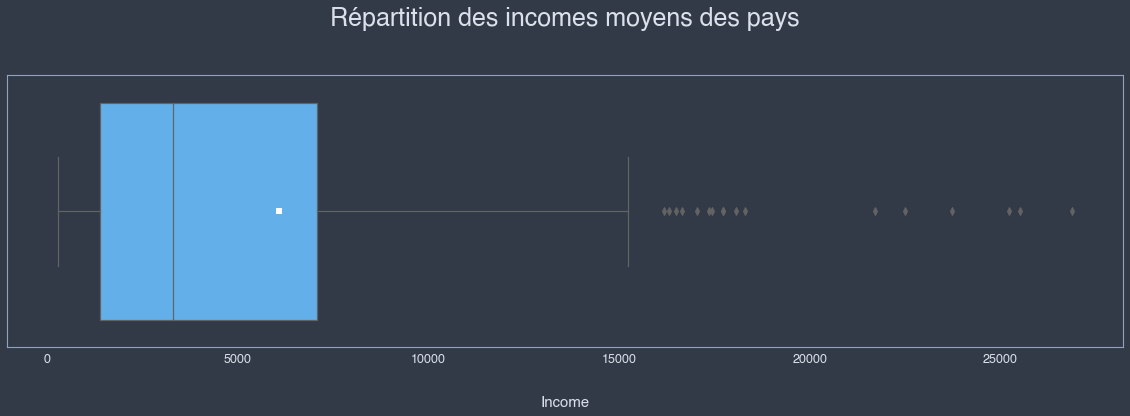

In [15]:
plt.figure(figsize = (20,5))

sns.boxplot(x='income', data=df.groupby('country')['income'].mean().reset_index(), orient='h', showmeans=True,
            palette=('#4cb2ff', '#61ba86'), meanprops={"marker":"s", "markerfacecolor":"white"})
plt.xlabel('Income', fontsize=15, labelpad=30, fontweight='bold')
plt.title('Répartition des incomes moyens des pays', fontsize=25, pad=50)

plt.show()

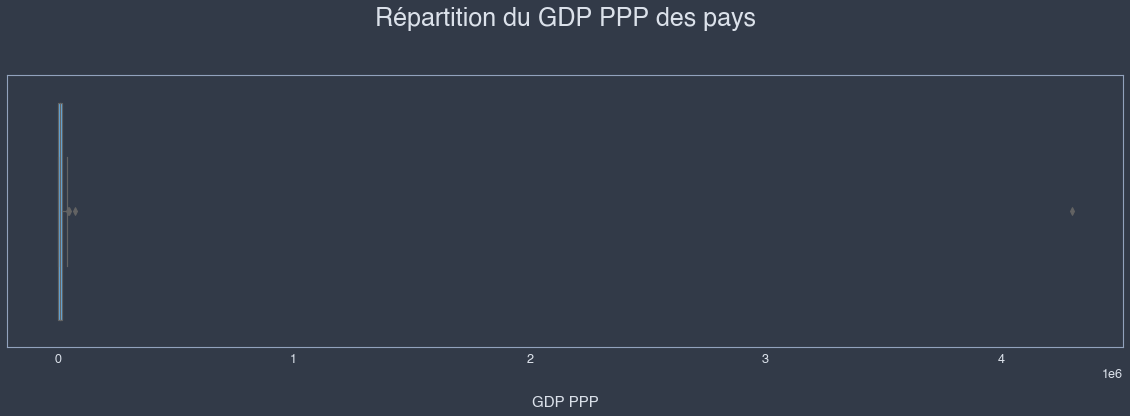

In [16]:
plt.figure(figsize = (20,5))

sns.boxplot(x='gdpppp', data=df.groupby('country')['gdpppp'].mean().reset_index(), orient='h', 
            palette=('#4cb2ff', '#61ba86'))
plt.xlabel('GDP PPP', fontsize=15, labelpad=30, fontweight='bold')
plt.title('Répartition du GDP PPP des pays', fontsize=25, pad=50)

plt.show()

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Cette visualisation attire donc notre attention sur l'outlier situé au dessus des 4 millions.
</div>

In [17]:
df[df['gdpppp'] == df['gdpppp'].max()]

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3200,FJI,2008,1,100,308.17334,4300332.0
3201,FJI,2008,2,100,384.33230,4300332.0
3202,FJI,2008,3,100,436.59265,4300332.0
3203,FJI,2008,4,100,486.81436,4300332.0
3204,FJI,2008,5,100,520.19720,4300332.0
...,...,...,...,...,...,...
3295,FJI,2008,96,100,5481.08200,4300332.0
3296,FJI,2008,97,100,6205.61400,4300332.0
3297,FJI,2008,98,100,7265.12550,4300332.0
3298,FJI,2008,99,100,9553.19200,4300332.0


<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p>
Il semblerait que le gdpppp des Fiji soit une valeur abérrante. Après vérification sur la WID,  <a href="https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2008&locations=FJ&start=2008"> le gdpppp des Fiji en 2008 </a> est égal à 7 777,73869.
<br><br>
A titre de comparaison : <br><br>
    
Les îles Fiji sont un pays d'Océanie avec une population (en 2008) de 845 361 habitants et une superficie de 18 270 km2. La France, avec une superficie de 672 0511 km2 et 64 370 000 d'habitants (en 2008) a un gdpppp qui s'élève à 35 095,266 (en 2008 toujours).
</div>

In [18]:
df.loc[df["country"]=="FJI"] = df.loc[df["country"]=="FJI"].replace(4300332.0, 7777.73869)

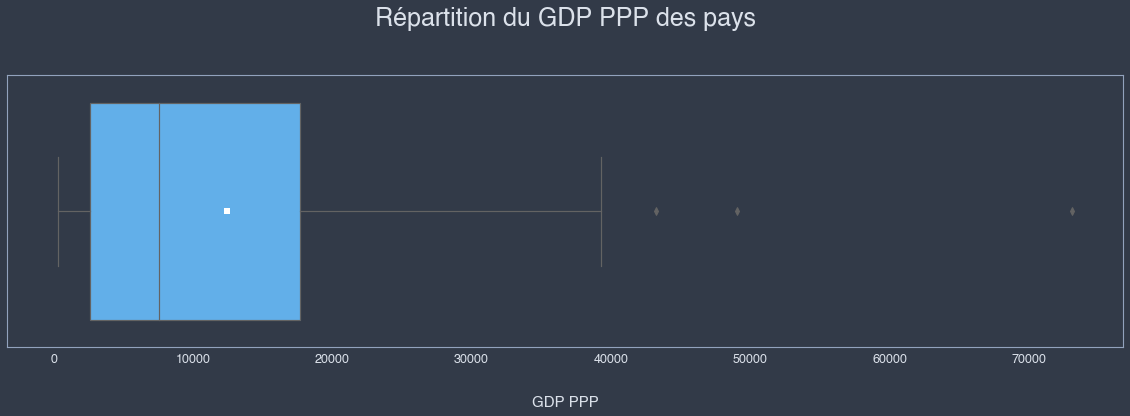

In [19]:
plt.figure(figsize = (20,5))
sns.boxplot(x='gdpppp', data=df.groupby('country')['gdpppp'].mean().reset_index(), orient='h', 
            palette=('#4cb2ff', '#61ba86'),showmeans=True, meanprops={"marker":"s", "markerfacecolor":"white"})
plt.xlabel('GDP PPP', fontsize=15, labelpad=30, fontweight='bold')
plt.title('Répartition du GDP PPP des pays', fontsize=25, pad=50)

plt.show()

## Population

In [20]:
population = pd.read_csv(path + 'Data_Extract_From_Population_estimates_and_projections_test.csv', 
                         keep_default_na=False, decimal=",")

In [21]:
#keep only useful data
population.drop(['Series Name', 'Series Code'], axis=1, inplace=True)
population.drop(np.arange(217,222), axis=0, inplace=True)
population = population.rename(columns = {'Country Name' : 'country_name',
                                          'Country Code' : 'country'})

#create df per year
pop2004 = population[['country_name', 'country', '2004 [YR2004]']].copy()
pop2006 = population[['country_name', 'country', '2006 [YR2006]']].copy()
pop2007 = population[['country_name', 'country', '2007 [YR2007]']].copy()
pop2008 = population[['country_name', 'country', '2008 [YR2008]']].copy()
pop2009 = population[['country_name', 'country', '2009 [YR2009]']].copy()
pop2010 = population[['country_name', 'country', '2010 [YR2010]']].copy()
pop2011 = population[['country_name', 'country', '2011 [YR2011]']].copy()

#add usefull columns for next step
pop2004['year_survey'] = 2004
pop2006['year_survey'] = 2006
pop2007['year_survey'] = 2007
pop2008['year_survey'] = 2008
pop2009['year_survey'] = 2009
pop2010['year_survey'] = 2010
pop2011['year_survey'] = 2011

#rename
pop2004 = pop2004.rename(columns = {'2004 [YR2004]' : 'population'})
pop2006 = pop2006.rename(columns = {'2006 [YR2006]' : 'population'})
pop2007 = pop2007.rename(columns = {'2007 [YR2007]' : 'population'})
pop2008 = pop2008.rename(columns = {'2008 [YR2008]' : 'population'})
pop2009 = pop2009.rename(columns = {'2009 [YR2009]' : 'population'})
pop2010 = pop2010.rename(columns = {'2010 [YR2010]' : 'population'})
pop2011 = pop2011.rename(columns = {'2011 [YR2011]' : 'population'})

#final df
population = pd.concat((pop2004, pop2006, pop2007, pop2008, pop2009, pop2010, pop2011))

df = pd.merge(df, population, on=('country', 'year_survey'), how='left')
df = df[['country_name', 'country', 'year_survey', 'quantile', 'nb_quantiles', 'income', 'gdpppp', 'population']]

#clean 
del pop2004, pop2006, pop2007, pop2008, pop2009, pop2010, pop2011, population

In [22]:
df.isna().sum()

country_name    100
country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
population      100
dtype: int64

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><b>Remarque : </b></p>
    
<p>Le code ISO TWN correspond à la Taïwan. 

<p><a href='https://countryeconomy.com/demography/population/taiwan?year=2008'> Population de la Taïwan en 2008 </a></p>                                                         
<p><a href='https://datahelpdesk.worldbank.org/knowledgebase/articles/114933-where-are-your-data-on-taiwan'> Where are your data on Taiwan? </a></p>

<p><a href='https://databank.worldbank.org/views/reports/reportwidget.aspx?Report_Name=CountryProfile&Id=b450fd57&tbar=y&dd=y&inf=n&zm=n&country=CHN'> Special Note from Metadata of People's Republic of China :</a> " [...] Unless otherwise noted, data for China do not include data for Hong Kong SAR, China ; Macao SAR, China ; or Taiwan, China. " </p> 
</div>

In [23]:
#treatment of nan
df.loc[df['country'] == 'TWN', 'country_name'] = 'Taïwan'
df.loc[df['country'] == 'TWN', 'population'] = 23037000
df['population'] = df['population'].astype(int)

#population covered by our df
df.groupby('country')['population'].unique().reset_index()['population'].astype(int).sum()

6188519737

[Population, Total - World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL?end=2011&start=2004&type=shaded&view=chart)

In [24]:
#average population from 2004 to 2011 (2005 excluded)
print(round((6.432 + 6.593 + 6.674 + 6.757 + 6.84 + 6.992 + 7.003) / 7, 4))

#population covered by the analysis
print(round(6.1885 * 100 / 6.7559,2), '%')

6.7559
91.6 %


## Méthode & définition

De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ? Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ?

L'unité utilisée dans la colonne income de la world income distribution est le $PPP. Cette unité est calculée par la Banque mondiale, selon la méthode Eltöte-Köves-Szulc. Après vous être documenté, vous expliquerez à votre mentor très brièvement à quoi correspond cette unité et pourquoi elle est pertinente pour une comparaison de pays différents (Il n'est pas nécessaire de donner cette explication lors de la soutenance).

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Méthode :</b></u></p>
                                                 
<p>L’approche statique de la mesure des inégalités s’appuie sur différents outils qui permettent d’appréhender la dispersion des revenus au sein d’une population étudiée. L’utilisation de quantiles permet d’ordonner la population étudiée en groupes égaux par ordre croissant, en fonction de la valeur que prend la dispersion étudiée dans ces derniers. Lorsque la population étudiée est découpée en tranches de 1%, il s'agit donc de centiles (ou percentiles). Le dernier centile de la population, représente ainsi les 1% des ménages les plus aisés.</p>                       <br>                               
<p>Echantillonner une population en quantile me parait donc être une bonne méthode. Le fait que la population soit découpée en centiles permet de conserver une partie de l'information plus homogène que si on l'avait découpé en déciles par exemple. Cela nous permet également de définir des classes de revenu de la même manière dans tous les pays.</p>
<br>                                                            
<p>De plus, d'autres outils, comme l'indice de Gini et la courbe de Lorenz, permettent également d'appréhender la dispersion des révenus d'une population. L'analogie me parait donc plus simple à comprendre avec des centiles (par exemple, on peut donc comparer la position du 25ème centile de la France avec le 85ème centile du Niger). </p>  
<br>
<p><u><b>Définition de l'unité $PPP :</b></u></p> 
<p>Parité de pouvoir d'achat (Purchasing Pwer Parity) est un taux de conversion monétaire qui permet d'exprimer dans une unité commune les pouvoirs d'achat des différentes monnaies. Ce taux exprime le rapport entre la quantité d'unités monétaires nécessaire dans des pays différents pour se procurer le même « panier » de biens et de services. </p>  
</div>

# Mission 2

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas.
<br><br>
- Représentez la courbe de Lorenz de chacun des pays choisis.
<br><br>
- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans.
<br><br>
- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

## Diversité des pays

### Indice de Gini 

In [25]:
#read csv
gini = pd.read_csv(path + 'Data_Extract_From_World_Development_Indicators_test.csv', keep_default_na=False, decimal=",")

#keep only useful data
gini.drop(['Series Name', 'Series Code'], axis=1, inplace=True)
gini.drop(np.arange(217,222), axis=0, inplace=True)
gini.replace('..', np.nan, inplace=True)
gini = gini.rename(columns = {'Country Name' : 'country_name', 'Country Code' : 'country'})

#rename columns
cols = gini.columns
renames = {col: col[:4] for col in cols[2:]}
gini.rename(columns=renames, inplace=True)

#create df per year
gini2004 = gini[['country_name', 'country', '2004']].copy()
gini2006 = gini[['country_name', 'country', '2006']].copy()
gini2007 = gini[['country_name', 'country', '2007']].copy()
gini2008 = gini[['country_name', 'country', '2008']].copy()
gini2009 = gini[['country_name', 'country', '2009']].copy()
gini2010 = gini[['country_name', 'country', '2010']].copy()
gini2011 = gini[['country_name', 'country', '2011']].copy()
 
#add usefull columns for next step
gini2004['year_survey'] = 2004
gini2006['year_survey'] = 2006
gini2007['year_survey'] = 2007
gini2008['year_survey'] = 2008
gini2009['year_survey'] = 2009
gini2010['year_survey'] = 2010
gini2011['year_survey'] = 2011
  
#rename
gini2004 = gini2004.rename(columns = {'2004' : 'gini'})
gini2006 = gini2006.rename(columns = {'2006' : 'gini'})
gini2007 = gini2007.rename(columns = {'2007' : 'gini'})
gini2008 = gini2008.rename(columns = {'2008' : 'gini'})
gini2009 = gini2009.rename(columns = {'2009' : 'gini'})
gini2010 = gini2010.rename(columns = {'2010' : 'gini'})
gini2011 = gini2011.rename(columns = {'2011' : 'gini'})
        
#final df
gini = pd.concat((gini2004, gini2006, gini2007, gini2008, gini2009, gini2010, gini2011))

df = pd.merge(df, gini, on=('country_name', 'country', 'year_survey'), how='left')

df = df[['country_name', 'country', 'year_survey', 'quantile', 'nb_quantiles', 'income', 'gdpppp', 'population', 
         'gini']]

df['gini'] = df['gini'].astype(float)

#clean
del gini, gini2004, gini2006, gini2007, gini2008, gini2009, gini2010, gini2011

In [26]:
#country of missing gini
gininan = df.groupby(['country_name', 'country', 'year_survey'])['gini'].mean().reset_index()
gininan = gininan[gininan['gini'].isna()]
gininan.head()

,country_name,country,year_survey,gini
4,Azerbaijan,AZE,2008,NaN
14,Cambodia,KHM,2008,NaN
16,Canada,CAN,2008,NaN
19,China,CHN,2007,NaN
21,"Congo, Dem. Rep.",COD,2008,NaN


In [27]:
#more year of gini data
gini = pd.read_csv(path + 'Data_Extract_From_World_Development_Indicators.csv', keep_default_na=False, decimal=",")

#keep only useful data
gini.drop(['Series Name', 'Series Code'], axis=1, inplace=True)
gini.drop(np.arange(217,222), axis=0, inplace=True)
gini.replace('..', np.nan, inplace=True)
gini = gini.rename(columns = {'Country Name' : 'country_name', 'Country Code' : 'country'})

#rename
cols = gini.columns
renames = {col: col[:4] for col in cols[2:]}
gini.rename(columns=renames, inplace=True)

#show only the country where gini index is missing
gini['missing_gini'] = gini['country_name'].isin(gininan[gininan['gini'].isna()]['country_name'])

test = pd.merge(gininan[gininan['gini'].isna()], gini[gini['missing_gini'] == True], on=['country_name', 'country'],
                how='left')

test.iloc[:, 4:-1] = test.iloc[:, 4:-1].astype(float)

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Pour les années où l'indice de Gini est manquant : </b></u></p>
                                                
<p>Je regarde donc l'année concernée du pays par notre étude, je recherche ensuite s'il y a une valeur pour l'année précédente ou suivante jusqu'à ce qu'une valeur soit renseignée.
<br><br>                               
Je ne dispose d'aucune informations supplémentaires concernant le Cambodia et la Taïwan.
<br><br>                                                           
    
Sur la WID, il n'y a visiblement pas de données disponibles non plus concernant ces deux pays. Après recherche, d'après ce <a href='https://fred.stlouisfed.org/series/SIPOVGINIKHM'>site</a>, qui cite comme source la WID, l'index de gini pour l'année 2008 du Cambodia est de 35.10. Pour la <a href='https://www.statista.com/statistics/922574/taiwan-gini-index/'>Taïwan</a>, l'indice de gini en 2010 est égal à 34.2.</p>  
</div>

In [28]:
#assignment of missing gini values 
df.loc[df['country'] == 'KHM', 'gini'] = 35.10
df.loc[df['country'] == 'TWN', 'gini'] = 34.2

df.loc[df['country'] == 'AZE', 'gini'] = test[test['country'] == 'AZE']['2005'].values[0]
df.loc[df['country'] == 'CHN', 'gini'] = test[test['country'] == 'CHN']['2008'].values[0]
df.loc[df['country'] == 'CAN', 'gini'] = test[test['country'] == 'CAN']['2007'].values[0]
df.loc[df['country'] == 'COD', 'gini'] = test[test['country'] == 'COD']['2004'].values[0]
df.loc[df['country'] == 'HRV', 'gini'] = test[test['country'] == 'HRV']['2009'].values[0]
df.loc[df['country'] == 'EGY', 'gini'] = test[test['country'] == 'EGY']['2008'].values[0]
df.loc[df['country'] == 'GHA', 'gini'] = test[test['country'] == 'GHA']['2005'].values[0]
df.loc[df['country'] == 'GTM', 'gini'] = test[test['country'] == 'GTM']['2014'].values[0]
df.loc[df['country'] == 'IND', 'gini'] = test[test['country'] == 'IND']['2009'].values[0]
df.loc[df['country'] == 'IRN', 'gini'] = test[test['country'] == 'IRN']['2009'].values[0]
df.loc[df['country'] == 'IRQ', 'gini'] = test[test['country'] == 'IRQ']['2006'].values[0]
df.loc[df['country'] == 'ISR', 'gini'] = test[test['country'] == 'ISR']['2007'].values[0]
df.loc[df['country'] == 'KEN', 'gini'] = test[test['country'] == 'KEN']['2005'].values[0]
df.loc[df['country'] == 'XKX', 'gini'] = test[test['country'] == 'XKX']['2006'].values[0]
df.loc[df['country'] == 'MYS', 'gini'] = test[test['country'] == 'MYS']['2008'].values[0]
df.loc[df['country'] == 'MLI', 'gini'] = test[test['country'] == 'MLI']['2009'].values[0]
df.loc[df['country'] == 'MNE', 'gini'] = test[test['country'] == 'MNE']['2012'].values[0]
df.loc[df['country'] == 'MAR', 'gini'] = test[test['country'] == 'MAR']['2006'].values[0]
df.loc[df['country'] == 'NGA', 'gini'] = test[test['country'] == 'NGA']['2009'].values[0]
df.loc[df['country'] == 'MKD', 'gini'] = test[test['country'] == 'MKD']['2009'].values[0]
df.loc[df['country'] == 'PAK', 'gini'] = test[test['country'] == 'PAK']['2007'].values[0]
df.loc[df['country'] == 'SRB', 'gini'] = test[test['country'] == 'SRB']['2012'].values[0]
df.loc[df['country'] == 'LKA', 'gini'] = test[test['country'] == 'LKA']['2006'].values[0]
df.loc[df['country'] == 'SYR', 'gini'] = test[test['country'] == 'SYR']['2003'].values[0]
df.loc[df['country'] == 'YEM', 'gini'] = test[test['country'] == 'YEM']['2005'].values[0]

#clean
del gininan, test

### Sélection des pays

In [29]:
df.groupby('country_name').agg({'income' : 'mean', 
                                'gdpppp' : 'mean', 
                                'gini' : 'mean', 
                                'population' : 'mean'}).describe()

,income,gdpppp,gini,population
count,116.000000,116.000000,116.000000,1.160000e+02
mean,6069.121925,12442.266884,37.902586,5.334931e+07
std,6660.966925,13150.998791,7.941487,1.670748e+08
min,276.016044,303.193050,23.700000,3.174140e+05
25%,1374.270126,2577.500000,32.050000,4.698545e+06
50%,3287.174692,7532.500000,35.800000,1.452863e+07
75%,7077.900152,17679.250000,43.000000,3.904949e+07
max,26888.511518,73127.000000,63.000000,1.317885e+09


<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Pour sélectionner les pays : </b></u></p>
                                                 
<p>On affiche le top 10 des premiers et derniers pays pour chaque variable dont on dispose (income, gdpppp et gini  ; cf ligne de code ci-dessous). On sélectionne donc les 2 premiers et derniers pays de ces classements. Ensuite, on vérifie qu'on dispose de l'évolution de l'index de gini sur les années de 2004 à 2011.</p> <br>    
<p>Problème rencontré : Pour certains pays, on ne dispose d'aucunes informations sur l'index de gini sur aucune année (2000 - 2020). Cela contraint à selectionner le ou les 2 pays suivants sur la liste, nottament pour les derniers pays possédant un income et un gdpppp faible (majoritairement des pays d'Afrique, où il est difficile de récolter des données ; c'est de cette façon que j'ai sélectionné l'Indonésie et la Palestine). 
<br><br>
Bien que pour l'Afrique du Sud on ne possède que deux index de gini sur les années étudiées, cette dernière étant assez représentative en terme de disparité, il m'a paru judicieux de conserver ce pays.</p>
</div>

In [30]:
#by taking this same line of code above, we therefore vary the parameter of the sort_valus method (income / gdpppp / 
#gini) and we use the .head() and .tail() methods.  
df.groupby('country_name').agg({'income' : 'mean',
                                'gdpppp' : 'mean',
                                'gini' : 'mean', 
                                'population' : 'mean'}).sort_values(['income'], ascending=False).head(10)



,income,gdpppp,gini,population
country_name,,,,
Iceland,26888.511518,36527.0,31.8,317414
United States,25503.581661,43261.0,40.8,304093966
Luxembourg,25217.562681,73127.0,32.6,488650
Canada,23739.640518,35895.0,33.8,33247118
Norway,22483.375020,49070.0,27.0,4768212
United Kingdom,21709.604470,34048.0,34.1,61806995
France,18309.407545,30357.0,33.0,64374979
Germany,18061.718142,33758.0,31.1,82110097
Netherlands,17728.641151,38065.0,29.3,16445593


In [31]:
#create df with only selected countries
selected_countries = df[(df['country'] == 'ISL') ^ (df['country'] == 'USA') ^ (df['country'] == 'FRA') ^ 
                        (df['country'] == 'HND') ^ (df['country'] == 'BRA') ^ (df['country'] == 'SVN') ^ 
                        (df['country'] == 'LUX') ^ (df['country'] == 'IDN') ^ (df['country'] == 'PSE') ^
                        (df['country'] == 'ZAF')]

### Visualisation

- Montrez la diversité des pays en termes de distribution de revenus à l'aide d'un graphique. Celui-ci représentera le revenu moyen (axe des ordonnées, sur une échelle logarithmique) de chacune des classes de revenus (axe des abscisses) pour 5 à 10 pays que vous aurez choisis pour montrer la diversité des cas. 

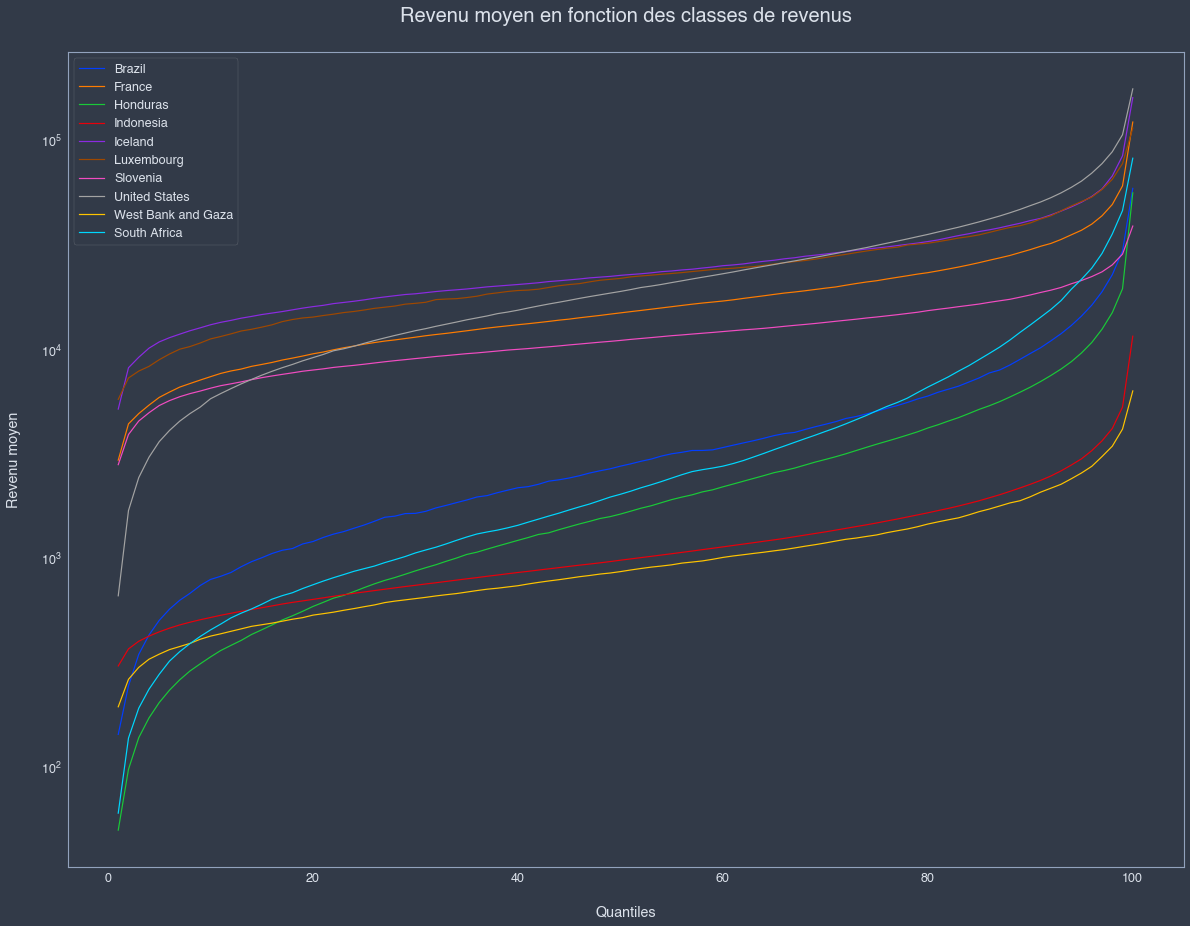

In [32]:
#diversity of countries
plt.figure(figsize=(20, 15))

sns.lineplot(x=selected_countries['quantile'], y=selected_countries['income'], hue=selected_countries['country_name'], 
             data=selected_countries, palette='bright')
plt.xlabel("Quantiles")
plt.ylabel("Revenu moyen")
plt.yscale("log")
plt.legend()
plt.title("Revenu moyen en fonction des classes de revenus", pad=30, fontsize=20, fontweight='bold')

plt.show()

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Note </b></u></p>
    
<p>Après cette première visualisation, on décide de réduire le nombre de pays sélectionnés, puisque certains suivent la même évolution. On garde donc les pays suivant : le Brésil, la France, l'Indonésie, l'Islande, la Slovénie, les États-Unis et l'Afrique du Sud</p>
</div>

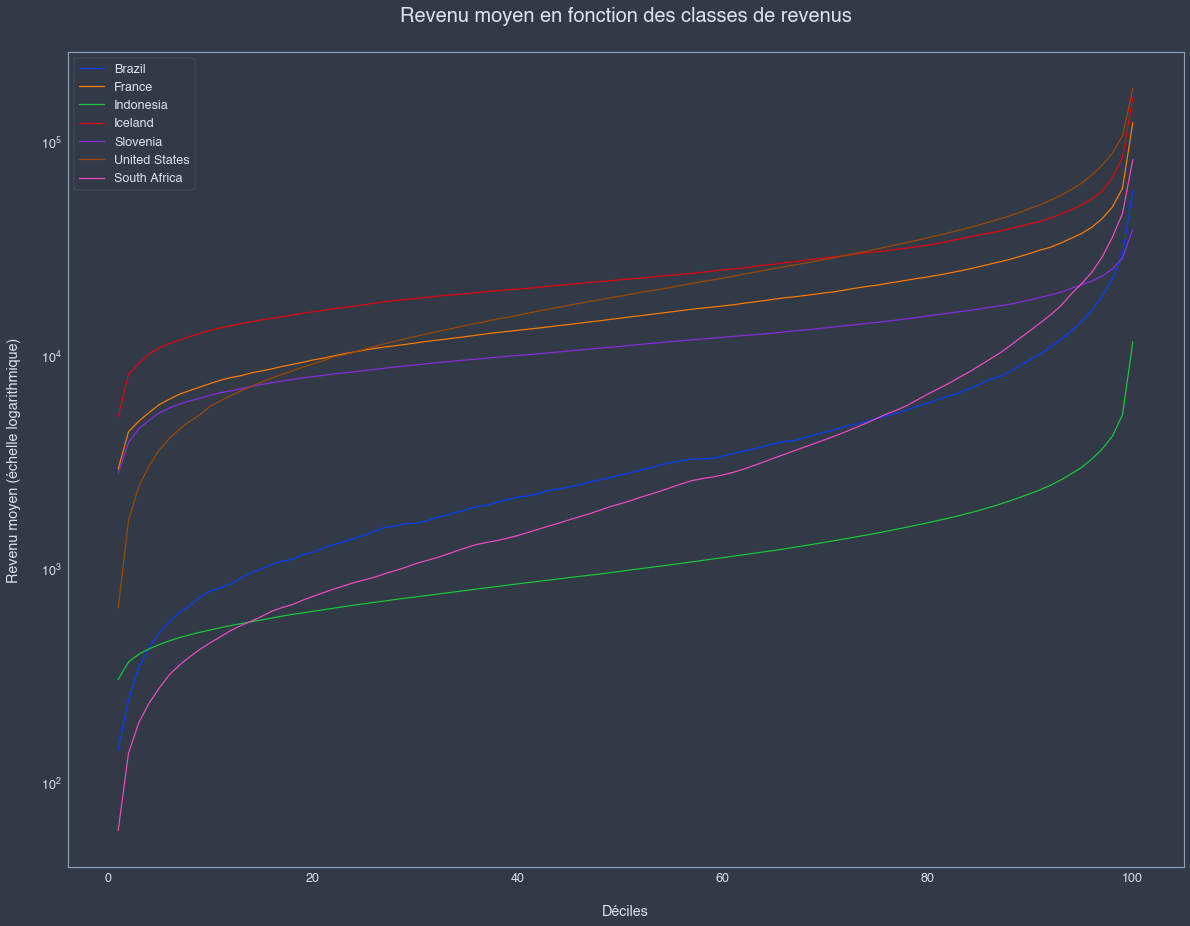

In [33]:
#modification of selected_countries

selected_countries = df[(df['country'] == 'ISL') ^ (df['country'] == 'USA') ^ (df['country'] == 'FRA') ^ 
                        (df['country'] == 'BRA') ^ (df['country'] == 'SVN') ^ (df['country'] == 'IDN') ^ 
                        (df['country'] == 'ZAF')]

#diversity of countries
plt.figure(figsize=(20, 15))

sns.lineplot(x=selected_countries['quantile'], y=selected_countries['income'], hue=selected_countries['country_name'], 
             data=selected_countries, palette='bright')

plt.xlabel("Déciles")
plt.ylabel("Revenu moyen (échelle logarithmique)")
plt.yscale("log")
plt.legend()
plt.title("Revenu moyen en fonction des classes de revenus", pad=30, fontsize=20, fontweight='bold')

plt.show()

## Courbe de Lorenz

- Représentez la courbe de Lorenz de chacun des pays choisis. 

### Pays par pays

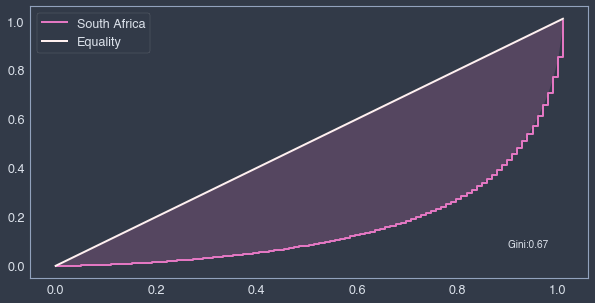

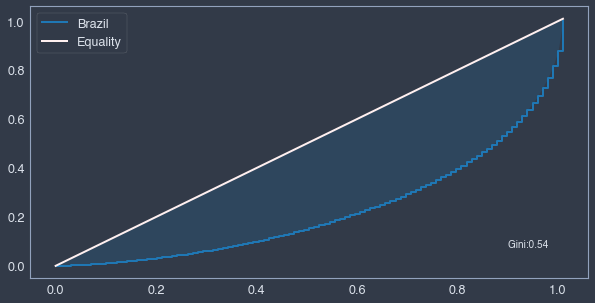

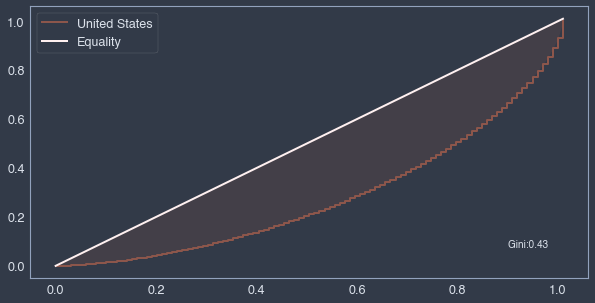

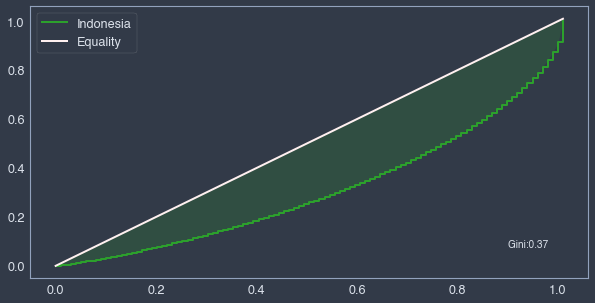

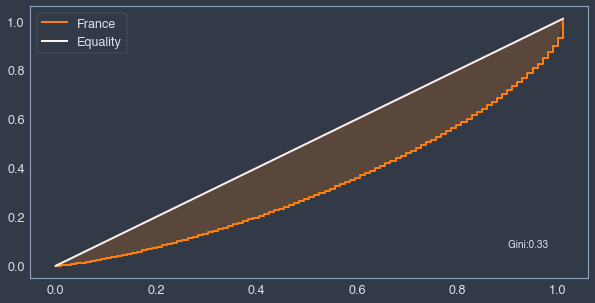

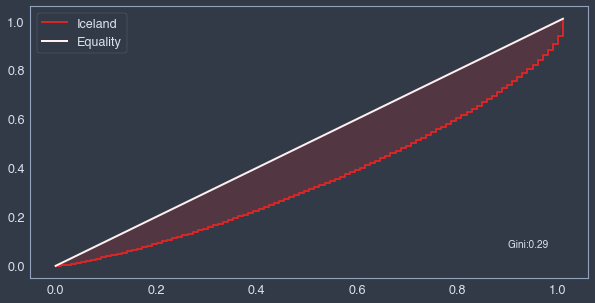

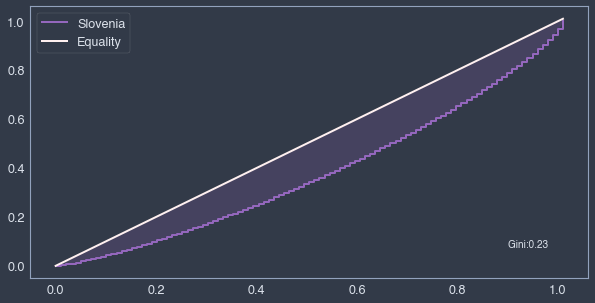

In [34]:
d = dict()

colors = ['tab:pink', 'tab:blue', 'tab:brown', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']

for country, color in zip(['ZAF', 'BRA', 'USA', 'IDN', 'FRA', 'ISL', 'SVN'], colors) :
    
    d[country] = selected_countries[selected_countries['country'] == country]

    income = d[country]['income'].values
    
    n = len(income)

    lorenz = np.cumsum(np.sort(income)) / income.sum()
    lorenz = np.append([0],lorenz)

    xaxis = np.linspace(0.01-1/n,1+1/n,n+1)

    X = np.arange(0,1.02,0.01)
    Y=X

    AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2) / n 
    S = 0.5 - AUC 
    Gini = 2*S

    #set figure
    plt.figure(figsize=(10,5))

    plt.plot(xaxis, lorenz, drawstyle='steps-post', label=d[country]['country_name'].unique()[0], lw=2, color=color)

    plt.plot(X, Y, color='#fff0f0', lw=2, label = 'Equality') 

    #plt.plot([0.8, 0.8], [0, 0.52], 'r--', lw=0.8)
    #plt.plot([0, 0.8], [0.52, 0.52], 'r--', lw=0.8)

    plt.fill_between(xaxis, lorenz, xaxis, color=color, alpha=0.2) # '#fff0f0'

    plt.text(0.9, 0.075, 'Gini:%s ' %round(Gini,2))
    plt.legend()
    #plt.title("Mesure de concentration - Income", fontsize=20, pad=30)
    #plt.savefig('', dpi=300, bbox_inches='tight', pad_inches=0.5)
    plt.show()
    
# The “B” area represents the cumulative resources owned by the population. The established convention is that the 
# X-axis goes from the most marginal group (e.g. the lowest income categorization) starting on the right and ends 
# on the left with the most powerful group.

# The “A” area represents the area or “gap” between the line of perfect equality and the actual distribution. The 
# Gini coefficient is the ratio of the area that lies between the line of equality and the Lorenz curve (“A”) over 
# the total area under the line of equality (“A” and “B”).

### Tous les pays

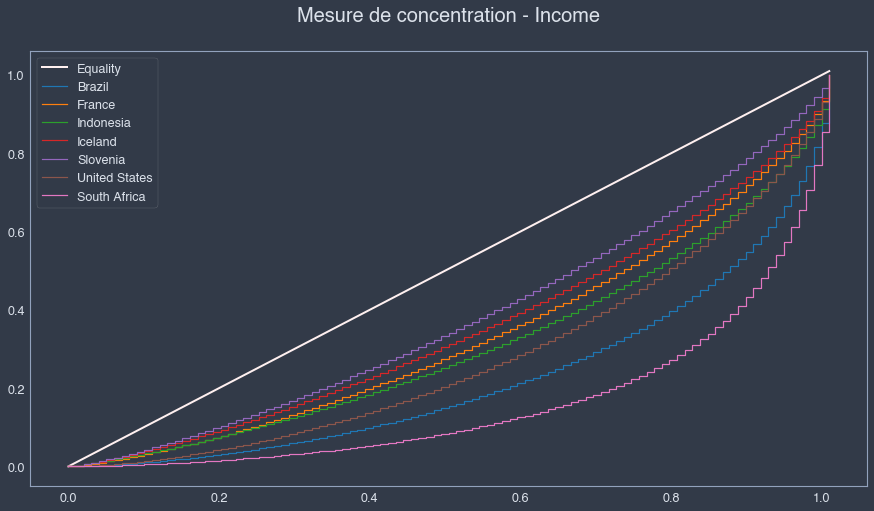

In [35]:
#set colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

#set figure
plt.figure(figsize=(15,8))

plt.plot(X, Y, color='#fff0f0', lw=2, label = 'Equality') 
    
for country, color in zip(['BRA', 'FRA', 'IDN', 'ISL', 'SVN', 'USA',  'ZAF'], colors) :

    d[country] = selected_countries[selected_countries['country'] == country]

    income = d[country]['income'].values

    n = len(income)

    lorenz = np.cumsum(np.sort(income)) / income.sum()
    lorenz = np.append([0],lorenz)   

    plt.plot(xaxis, lorenz, drawstyle='steps-post', label=d[country]['country_name'].unique()[0], color=color)
    plt.legend()
    plt.title("Mesure de concentration - Income", fontsize=20, pad=30)

#plt.savefig('', dpi=300, bbox_inches='tight', pad_inches=0.5)    
plt.show()

## Evolution de l'indice de Gini

- Pour chacun de ces pays, représentez l'évolution de l'indice de Gini au fil des ans. 

In [36]:
gini_selected_countries = gini[(gini['country'] == 'ISL') ^ (gini['country'] == 'USA') ^ (gini['country'] == 'FRA') ^ 
                               (gini['country'] == 'BRA') ^ (gini['country'] == 'SVN') ^ (gini['country'] == 'IDN') ^ 
                               (gini['country'] == 'ZAF')]

gini_selected_countries = gini_selected_countries[['country', '2004', '2006', '2007', '2008', '2009', '2010', 
                                               '2011']].sort_values(by='country')

gini_selected_countries

,country,2004,2006,2007,2008,2009,2010,2011
26,BRA,56.5,55.6,54.9,54,53.7,NaN,52.9
68,FRA,30.6,29.7,32.4,33,32.7,33.7,33.3
90,IDN,32.7,34.3,35.7,35.2,35.1,36.4,39.7
88,ISL,28,30.2,29.5,31.8,28.7,26.2,26.8
174,SVN,24.8,24.4,24.4,23.7,24.8,24.9,24.9
206,USA,40.3,41.4,40.8,40.8,40.6,40,40.9
177,ZAF,NaN,NaN,NaN,63,NaN,63.4,NaN


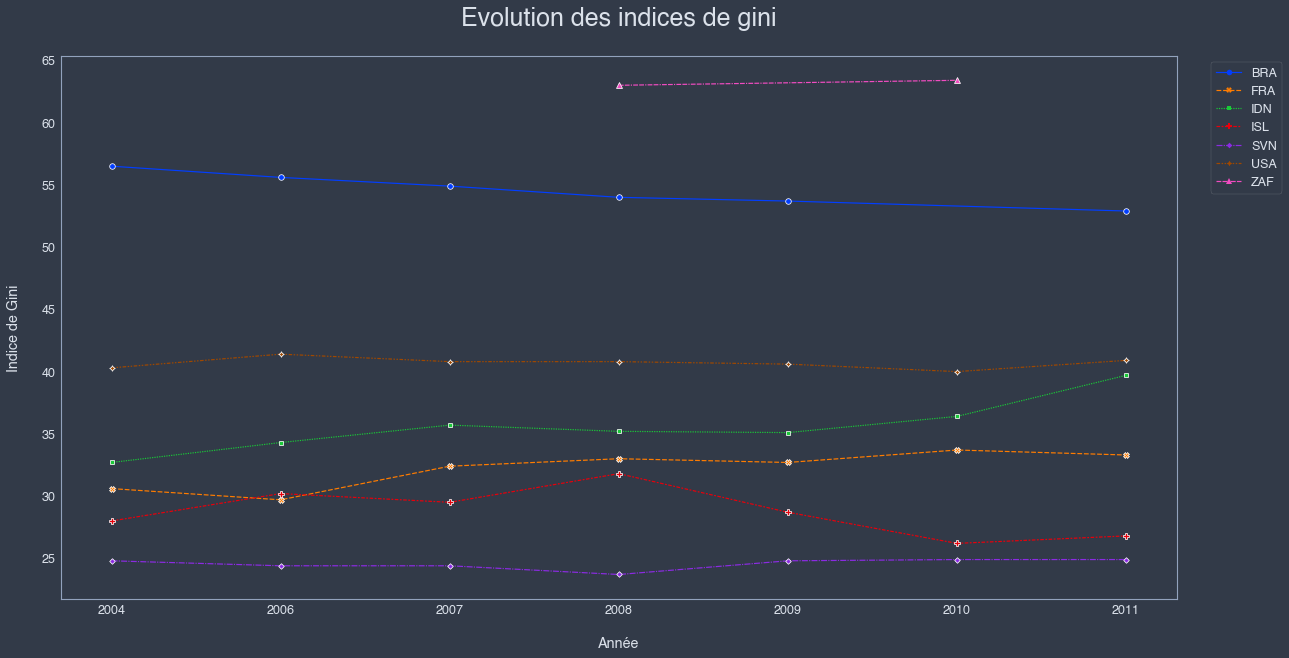

In [37]:
plt.figure(figsize=(20,10))

sns.lineplot(data=gini_selected_countries.set_index('country').T.astype(float), markers=True, palette='bright')
plt.xlabel('Année')
plt.ylabel('Indice de Gini')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.5, 0, 0.5))
plt.title('Evolution des indices de gini', pad=30, fontsize = 25, fontweight='bold')

plt.show()

- Classez les pays par indice de Gini. Donnez la moyenne, les 5 pays ayant l'indice de Gini le plus élevé et les 5 pays ayant l'indice de Gini le plus faible. En quelle position se trouve la France ?

In [38]:
print("La moyenne des indices de gini est de :", round(df['gini'].mean(),2))

La moyenne des indices de gini est de : 37.9


In [39]:
df.groupby('country_name').agg({'gini' : 'mean'}).sort_values('gini').head()

,gini
country_name,
Slovenia,23.7
Denmark,25.2
Slovak Republic,26.0
Czech Republic,26.3
Ukraine,26.6


In [40]:
df.groupby('country_name').agg({'gini' : 'mean'}).sort_values('gini', ascending=False).head()

,gini
country_name,
South Africa,63.0
Central African Republic,56.2
Honduras,55.5
Colombia,55.3
Brazil,54.0


In [41]:
fra = df.groupby('country_name').agg({'gini' : 'mean'}).reset_index()
print("Position de le France :", fra[fra['country_name'] == 'France'].index[0]+1)
fra[fra['country_name'] == 'France']

Position de le France : 37


,country_name,gini
36,France,33.0


# Mission 3 

<p>
Dans l'état actuel, nous avons à disposition deux des trois variables explicatives souhaitées :<br><br>
    - \(m_{j}\) le revenu moyen du pays  \(j\) <br>
    - \(G_{j}\) l'indice de Gini du pays \(j\) <br><br>
Il nous manque donc, pour un individu  \(i\) , la classe de revenu \(c_{i,parent}\) de ses parents.
</p>
<br>
<div class="admonition note alert alert-info" style="color:#4cb2ff">
Nous supposons ici que l'on associe à chaque individu \(i\) une unique classe \(c_{i,parent}\) ; quel que soit le nombre de parents de \(i\).
</div>
                                                              
<p>
Nous allons donc simuler cette information grâce à un coefficient \(\rho_{j}\) (propre à chaque pays \(j\) ), mesurant une corrélation entre le revenu de l'individu \(i\) et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité ; il mesure la mobilité intergénérationnelle du revenu.
</p>    
<br>                                                         
<div class="admonition note alert alert-info" style="color:#4cb2ff">
Pour plus d'informations sur le calcul du coefficient d'élasticité, consulter ce <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/2011-measuring-intergenerational-income-mobility-art.pdf">document</a>, notamment l'équation 1 de la page 8. Ce coefficient est déterminé par une régression linéaire simple dans laquelle le logarithme du revenu de l'enfant \(Y_{child}\) est une fonction du logarithme du revenu des parents \(Y_{parent}\) :
\[ln(Y_{child}) = \alpha + \rho_j\ ln(Y_{parent}) + \epsilon\]  
</div>

<p><br>
Pour obtenir le coefficient d'élasticité, deux possibilités s'offrent à vous : <br>
<br>    
<li>Vous baser sur ces coefficients donnés par la Banque mondiale, dans GDIM dataset : <a href="http://www.worldbank.org/en/topic/poverty/brief/what-is-the-global-database-on-intergenerational-mobility-gdim"> dataset</a>. Le coefficient d'élasticité est donné pour certains pays, sous le nom d'IGE Income (relative IGM in income). </li><br>
<li>Vous baser sur des estimations provenant de multiples études, extrapolées à différentes régions du monde :  elles se trouvent dans le fichier <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/projet_7.zip">elasticity.txt</a>.</li><br></p>
   
<p>
Attention, ces données sont parfois anciennes. <br>
Il est aussi possible de combiner ces deux approches. <br>
Pour chaque pays, nous allons utiliser une génération aléatoire de la classe de revenu des parents, à partir de ces seules deux informations : 
\(\rho_j\) la classe de revenu de l'enfant  \(c_{i,child}\).
</p>
<br>
<div class="alert alert-block alert-warning" style="color:#F6EADE">
Attention à bien utiliser la classe de revenu de l'enfant (qui est un nombre compris entre 1 et 100 si vous utilisez 100 quantiles), plutôt que son revenu PPP. De même, on ne cherche pas à générer le revenu des parents, mais la classe de revenu des parents \(c_{i,parent}\).
</div> 

<p>
Voici le protocole de génération pour un pays \(j\) donné, qui se base sur l'équation donnée ci dessus : </p>
<br>
<div class="admonition note alert alert-info" style="color:#4cb2ff">
Un exemple de code permettant de réaliser les opérations 1 à 6 est donné tout en bas. Libre à vous de l'utiliser. Notamment, la fonction  proba_cond  vous donnera les probabilités \(P(c_{i,parent} \ | \ c_{i,child,} \ \rho_{j=0.9})\). 
</div>

## Questions 1 à 3 

<ol><li>Générez un grand nombre \(n\) de réalisations d'une variable que nous appellerons  \(ln(Y_{parent})\) selon une loi normale. Le choix de la moyenne et de l'écart type n'auront pas d'incidence sur le résultat final. \(n\) doit être supérieur à 1000 fois le nombre de quantiles.</li>
<br>
<li>Générez \(n\) réalisations du terme d'erreur \(\epsilon\) selon une loi normale de moyenne 0 et d'écart type 1.</li>
<br>    
<li>Pour une valeur donnée de \(\rho_j\) (par exemple 0.9), calculez \(y_{child} = e^{\alpha+\rho_jln(y_{parent})+\epsilon}\) . Le choix de \( \alpha\) n'a aucune incidence sur le résultat final et peut être supprimé. À ce stade, \(y_{child}\) contient des valeurs dont l'ordre de grandeur ne reflète pas la réalité, mais cela n'a pas d'influence pour la suite.</li></ol>

In [42]:
def generate_incomes(n, pj):
    
    """
    Paramètres : 
        n : nombre de réalisations
        pj : coefficient d'élasticité du pays j
        
    Renvoie les n salaires enfants et les n salaires des parents respectifs
    """
    
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    
    # On calcule le salaire des enfants en fonction de la fonction linéaire et de l'indice d'élasticité pj
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)

In [43]:
#elasticity coefficient of country j
pj = 0.9 

#number of quantiles (number of income classes)
nb_quantiles = 100

#sample size
n = 1000 * nb_quantiles  

#calculation
y_child, y_parents = generate_incomes(n, pj)

## Question 4 

<ol start="4">
<li>Pour chacun des \(n\) individus générés, calculez la classe de revenu  \(c_{i,child}\) ainsi que la classe de revenu de ses parents \(c_{i,parent}\) , à partir de \(y_{child}\) et \(y_{parent}\).</li> </ol>


In [44]:
def quantiles(l, nb_quantiles):
    
    """
    Paramètres : 
        l (série) 
        nb_quantiles
        
    Renvoie une série indiquant le quantile qui correspond a chaque valeur de l
    """
    
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])


def compute_quantiles(y_child, y_parents, nb_quantiles):
    
    """
    Paramètres : 
        y_child : revenu enfant (array)
        y_parents : revenu parents (array) 
        nb_quantiles
        
    Renvoie un dataframe
    """
    
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    
    return sample

In [45]:
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
sample.head()

,y_child,y_parents,c_i_child,c_i_parent
0,3.114768,1.329699,81,62
1,0.543199,1.663442,33,70
2,0.432047,0.224256,27,7
3,1.724858,1.566549,66,68
4,0.831986,1.989852,45,76


## Question 5
<ol start=5><li>À partir de cette dernière information, estimez pour chaque  \(c_{i,child}\) la distribution conditionnelle de \(c_{i,parent}\) . Par exemple, si vous observez 6 individus ayant à la fois  \(c_{i,child} = 5\) et \(c_{i,parent} = 8\) , et que 200 individus sur 20000 ont \( c_{i,child} = 5\) , alors la probabilité d'avoir \( c_{i,parent} = 8\) sachant  \(c_{i,child} = 5\) et sachant \(\rho_j=0.9\) sera estimée à 6/200 (On note cette probabilité comme ceci : \(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03\)). Si votre population est divisée en \(c\) classes de revenu, vous devriez alors avoir \(c^2\) estimations de ces probabilités conditionnelles, pour chaque pays.</li></ol>

In [46]:
def distribution(counts, nb_quantiles):
    
    """
    Paramètres : 
        counts (df) : c_i_child | c_i_parent | counts 
            c_i_child : fixée,
            c_i_parent : la classe des parents, 
            counts : le nombre d'individus représentés (enfant / parents)
        nb_quantiles

    Renvoie la distribution des classes de revenu des parents pour la classe enfant sour la forme d'un array à une 
    dimension (i+1 étant la classe des parents).
    """
    
    distrib = []
    # On compte le nombre totale d'individus
    total = counts["counts"].sum()
    
    # S'il n'y a aucun individus, une ligne de 0 est renvoyée
    if total == 0 :
        return [0] * nb_quantiles
    
    # Pour chaque quantiles parents
    for q_p in range(1, nb_quantiles+1):
         # On ne garde que les lignes du quantile parent concerné
        subset = counts[counts.c_i_parent == q_p]
        
        if len(subset):
            # Si la longueur n'est pas nulle, on ajoute au resultat la fréquence d'apparition de q_p
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    
    return distrib   


def conditional_distributions(sample, nb_quantiles):
    
    """
    Paramètres : 
        sample (df) : y_child | y_parents | c_i_child | c_i_parents
        nb_quantiles
        
    Renvoie une matrice à deux dimensions :
        - une ligne par quantile enfant
        - au sein d'une ligne, on a la distribution des quantiles des parents
        Les valeurs peuvent être interprétées comme des probabilités 'c_parent sachant c_enfant'
    """
    
    # On compte le nombre d'individus (parents / enfant)  qu'il y a pour chaque paire de quantiles parents / enfant
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    # Enumeration des numeros des quantiles
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 
    
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child-1, c_i_parent-1]

In [47]:
cd = conditional_distributions(sample, nb_quantiles)

c_i_child = 5
c_i_parent = 8

p = proba_cond(c_i_parent, c_i_child, cd)

print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, round(p,2)))


P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.03


## Question 6

<ol start=6><li>Optionnellement et pour vérifier la cohérence de votre code, vous pouvez créer un graphique représentant ces distributions conditionnelles. Voici 2 exemples pour une population segmentée en 10 classes, pour 2 valeurs de \(\rho_j\) : l'une traduisant une forte mobilité (0.1) et l'autre une très faible mobilité (0.9) : </li></ol>

<img src="2.png" width="400" height="400">
<img src="1.png" width="400" height="400">

In [48]:
def plot_conditional_distributions(p, cd, nb_quantiles):
    
    """
    Paramètres : 
        p : coefficient d'élasticité 
        cd : matrice des distributions conditionnelles 
        nb_quantiles
        
     Les lignes suivantes servent à afficher un graphique en "stack bars", suivant ce modèle : 
                        https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    """
    
    plt.figure()
    
    my_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
                 'tab:olive', 'tab:cyan']
    
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) + "e", 
               color = my_colors[i])
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.xlim(0,11)
    plt.title("p=" + str(p))
    plt.legend(bbox_to_anchor=(1.1, 0.5, 0.2, 0.5))
    plt.xlabel("Quantile parents")
    plt.ylabel("Probabilité du quantile enfant")
    plt.show()

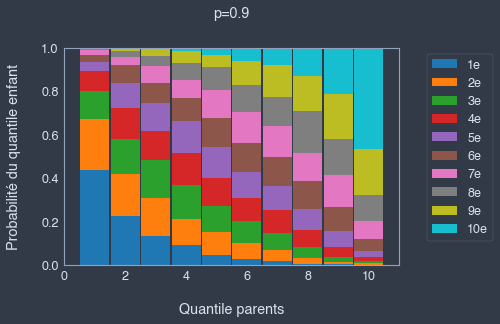

In [49]:
#number of quantiles (number of income classes)
nb_quantiles = 10

#sample size
n = 1000 * nb_quantiles  

#calculation
y_child, y_parents = generate_incomes(n, pj)

sample = compute_quantiles(y_child, y_parents, nb_quantiles)

cd = conditional_distributions(sample, nb_quantiles)

plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10

# L'interprétation c'est dans le premier decile parent = 42 % pour l'enfant d'être le premier décile == faible mobilité 
# indice d'élasticité fort = faible mobilité 

## Question 7

<ol start=7><li>Éventuellement et pour éviter toute confusion, effacez les individus que vous venez de générer (nous n'en avons plus besoin), et ne gardez que les distributions conditionnelles.</li></ol>


In [50]:
del y_parents, y_child

## Question 8

<ol start=8><li>Nous allons maintenant travailler sur un nouvel échantillon. Celui-ci sera créé à partir de la WID. Pour chaque individu de la World Income Distribution, créez-en 499 "clones". La taille de votre nouvel échantillon sera donc 500 fois plus grand que celui de la World Income Distribution.</li></ol>

In [51]:
#we consider that each percentile is an individual child 
df1 = df[['country_name', 'country', 'quantile', 'income']]
df1.columns = ['country_name', 'country', 'c_i_child', 'y_child']

#we create 500 copies of each child
df1 = pd.concat([df1] * 500, ignore_index=True)

#storage optimization
df1['country'] = df1['country'].astype('category')
df1['c_i_child'] = df1['c_i_child'].astype('int8')

<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Note</b></u></p>
                                                 
<p>Le nouveau dataframe df1 obtenu est donc le résultat de la simulation d'individus supplémentaires de notre dataframe original df. Ce nouveau dataframe est composé de 5 800 000 lignes contenant toujours 116 pays. Pour chaque pays, on a donc 50 000 individus et pour chaque centile, 500 individus à revenus égaux. On considère désormais les income comme les y_child.</p>
</div>

## Question 9

<ol start=9><li>Pour chaque \(c_{i,child}\) et chaque pays, il y a maintenant 500 individus. Vous attribuerez aux 500 individus leurs classes \( c_{i,parent}\) conformément aux distributions trouvées précédemment. Par exemple, si \(P(c_{i,parent}=8|c_{i,child}=5,\rho_j=0.9) = 0.03\) , alors vous assignerez la classe \(c_{i,parent} = 8\) à 15 des 500 individus du pays \( j\) ayant \(c_{i,child}=5\) , car 500*0.03 = 15.</li></ol>

### Coefficients d'élasticité 

In [53]:
#2018 elasticity coefficients data from wid
wid = pd.read_csv(path + 'GDIMMay2018.csv', sep = ",")

#elasticity coefficients == IGEincome
coeff_pj = wid.groupby('wbcode')['IGEincome'].mean().reset_index()

#rename
coeff_pj.columns = ['country', 'p_j']

#merge
df1 = df1.merge(coeff_pj, how = 'left', on = 'country')

### Coefficients d'élasticité manquants

In [54]:
#file elasticity.txt provided by OpenClassRooms - cf paragraph 1.3.3

| Region                             | Base Case       | Optimistic (high mobility) | Pessimistic (low mobility) |
| :--------------------------------- |:---------------:|:--------------------------:|:--------------------------:| 
| Nordic European countries & Canada | 0.2             | 0.15                       | 0.3                        |
| Europe (except nordic countries)   | 0.4             | 0.3                        | 0.5                        |
| Australia/New Zealand/USA          | 0.4             | 0.3                        | 0.5                        |
| Asia                               | 0.5             | 0.4                        | 0.6                        |
| Latin America/Africa               | 0.66            | 0.5                        | 0.9                        |


<div class="admonition note alert alert-info" style="color:#4cb2ff">
<p><u><b>Remarque</b></u></p>
                                                 
<p>Dans le dataframe nommé wid, les régions ne sont pas correctement renseignées (certains pays ont pour région 'High Income'). On importe donc un autre csv provenant de la WID afin d'avoir la correspondance pays / région et ainsi pouvoir attribuer les coefficients d'élasticité manquants facilement.</p>
</div>

In [55]:
#read csv
region = pd.read_csv(path + 'Metadata_Country_API_SI.POV.GINI_DS2_en_csv_v2_2764025.csv')

#select usefull columns
region = region[['Country Code', 'Region']]

#rename columns
region.columns = ['country', 'region']

#merge
df1 = df1.merge(region, how = 'left', on = 'country')

#reorder
df1 = df1[['country_name', 'country', 'region', 'c_i_child', 'y_child', 'p_j']]

#regions present
df1['region'].unique()

array(['Europe & Central Asia', 'Latin America & Caribbean',
       'Sub-Saharan Africa', 'South Asia', 'North America',
       'East Asia & Pacific', 'Middle East & North Africa', nan],
      dtype=object)

In [56]:
#which country returns a nan region ?
df1[df1['region'].isna()]['country_name'].unique()

array(['Taïwan'], dtype=object)

In [57]:
#value attribution
df1['region'] = df1['region'].fillna("East Asia & Pacific")

In [58]:
#for which region the elasticity coefficients are missing?
df1[df1['p_j'].isna()]['region'].unique()

array(['Latin America & Caribbean', 'Europe & Central Asia',
       'Sub-Saharan Africa', 'South Asia', 'East Asia & Pacific',
       'Middle East & North Africa'], dtype=object)

In [61]:
d = {'Latin America & Caribbean' : 0.66,
     'Europe & Central Asia' : 0.4,
     'Sub-Saharan Africa' : 0.66,
     'South Asia' : 0.5,
     'East Asia & Pacific' : 0.5,
     'Middle East & North Africa' : 0.66}

#value attribution
for e in d : 
    df1[df1['region'] == e] = df1[df1['region'] == e].fillna(d[e])

#reorder
df1 = df1.sort_values(['country_name', 'c_i_child']).reset_index(drop = True)

### Calcul des c${_{i,parent}}$ 

<div class="admonition note alert alert-info" style="color:#4cb2ff">
Pour plus d'informations sur le calcul du coefficient d'élasticité, consulter ce <a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/2011-measuring-intergenerational-income-mobility-art.pdf">document</a>, notamment l'équation 1 de la page 8. Ce coefficient est déterminé par une régression linéaire simple dans laquelle le logarithme du revenu de l'enfant \(Y_{child}\) est une fonction du logarithme du revenu des parents \(Y_{parent}\) :
\[ln(Y_{child}) = \alpha + \rho_j\ ln(Y_{parent}) + \epsilon\] 
</div>

Affichage formule y_parent = ... 

In [68]:
def c_i_parent(y_child, pj, alpha=0, nb_quantiles=100):
    
    #sample size
    size = len(y_child)
    
    #quantiles
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size)- 0.5 + 1./size)
    
    #generation of a realization of the error term epsilon
    epsilon = st.norm(0,1).rvs(size)
    
    #calculation of y_parent
    y_parent = [np.exp((np.log(x) - alpha - y)/pj) for x, y in zip(y_child, epsilon)]
    
    #dict() c_i_parent
    q_dict = {a : int(b) for a, b in zip(np.sort(y_parent), quantiles)}
    
    #list() c_i_parent
    return [q_dict[e] for e in y_parent]

In [69]:
%%time

centiles_parent = np.array([], dtype=int)

for k in df1['country'].unique():
    centiles_parent = np.append(centiles_parent, c_i_parent(df1[df1['country'] == k]['y_child'], p_j[k] , alpha=2),
                                axis = 0)

CPU times: user 48.7 s, sys: 1.42 s, total: 50.1 s
Wall time: 50.2 s


In [72]:
#assign
df1["c_i_parent"] = centiles_parent

#clean
del centiles_parent

#show
df1.head()

,country_name,country,region,c_i_child,y_child,p_j,c_i_parent
0,Albania,ALB,Europe & Central Asia,1,728.89795,0.815874,1
1,Albania,ALB,Europe & Central Asia,1,728.89795,0.815874,4
2,Albania,ALB,Europe & Central Asia,1,728.89795,0.815874,1
3,Albania,ALB,Europe & Central Asia,1,728.89795,0.815874,4
4,Albania,ALB,Europe & Central Asia,1,728.89795,0.815874,16


## Question 10

<li><ol start=9>Éventuellement et pour éviter toute confusion, effacez la variable \(c_{i,child}\)  : nous n'en avons pas besoin pour la mission 4.</ol></li>

In [ ]:
df1 = df1.drop(columns='c_i_child')

## Question 11

<li><ol start=11>Assurez-vous que votre nouvel échantillon contiennent bien les variables initialement présentes dans la World Income Distribution : \(m_j\) et \(G_j\).</ol></li>

Utilisez ce nouvel échantillon pour la mission 4.